# TD/TP 3 : complément sur le modèle linéaire
UE Modèle linéaire  
Auteur : Antoine Legendre  
Aix-Marseille Université / Faculté des Sciences

:::{.callout-warning}
Pensez à mettre votre nom dans l'entête du document.
:::

Nous aurons besoin des packages ci-dessous pour faire les deux exercices. S'ils ne sont pas disponibles sur votre ordinateur, merci de les installer.

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import matplotlib.pyplot as plt

## Exercice 1 : régression ridge

On s'intéresse à jeu de données portant sur l'endettement d'habitants des USA via leurs cartes de crédit. Les variables du jeu de données sont :

- `Income` : revenu annuel (en millier de dollars US)
- `Limit` : plafond de crédit (en dollars US)
- `Rating` : cote de solvabilité
- `Cards` : nombre de cartes de crédit
- `Age` : âge (en années)
- `Education` : nombre d'années d'instruction
- `Own` : propriétaire d'un logement
- `Student` : étudiant
- `Married` : statuts marital
- `Region` : région de vie 
- `Balance` : dette moyenne sur la carte de crédit

L'objectif est d'étudier la dette moyenne.


In [4]:
credit = pd.read_csv("Credit.csv")

### Etude rapide du jeu de données

Les trois graphiques ci-dessous portent sur la cote de solvabilité. 

- De quoi sont composés ces graphiques ?
- Comment les interprétez-vous ?

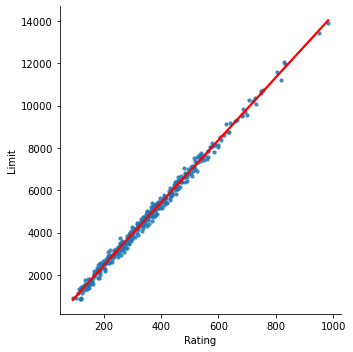

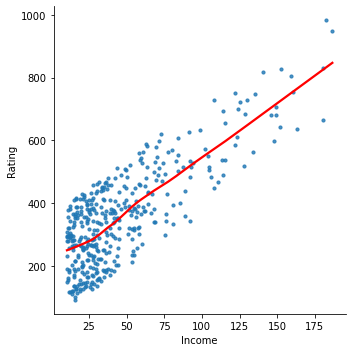

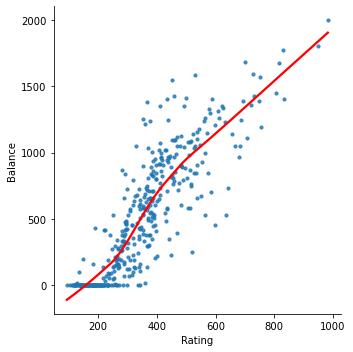

In [5]:
sns.lmplot(x='Rating', y='Limit', data=credit, lowess=True, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.show()

sns.lmplot(x='Income', y='Rating', data=credit, lowess=True, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.show()

sns.lmplot(x='Rating', y='Balance', data=credit, lowess=True, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.show()

Il est facile de voir que quelques variables sont corrélées avec la dette moyenne. Voici trois graphiques qui montrent ces corrélations. 

- Comment sont-ils construits ?
- Comment les interprétez-vous ?

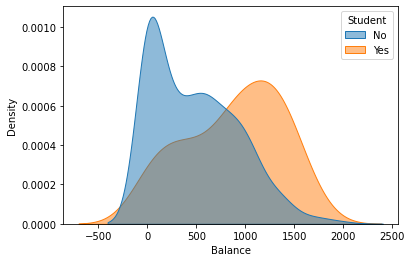

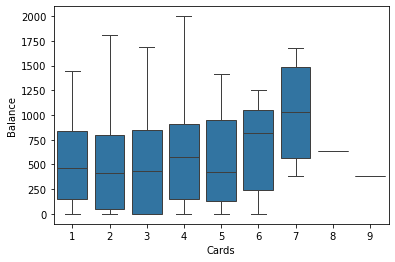

In [6]:
sns.kdeplot(data=credit, x='Balance', hue='Student', fill=True, alpha=0.5, common_norm=False)
plt.show()

credit['Cards'] = credit['Cards'].astype('category')
sns.boxplot(x='Cards', y='Balance', data=credit)
credit['Cards'] = credit['Cards'].astype('float')

plt.show()

À l'aide de la commande `smf.ols`, ajuster le "modèle complet", qui prédit la variable `Balance` avec l'ensemble de toutes les autres covariables. Enregistrer le résultat dans un objet nommé `m_complet`. Puis utiliser la méthode `.summary()` et un `print` pour obtenir des résultats numériques. Et, enfin, commentez les.


In [10]:
# Ajuster le modèle complet
m_complet = smf.ols(
    formula='Balance ~ Income + Limit + Rating + Cards + Age + Education + Own + Student + Married + Region',
    data = credit
).fit()

# Afficher le résumé
print(m_complet.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          1.11e-253
Time:                        08:30:55   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -479.2079     35.774    -

Le jeu de données contient des variables catégorielles. La matrice $\mathbf X$ utilisée pour faire le calcul de $\widehat\beta$ contient donc des variables binaires pour remplacer ces variables catégorielles.

- À la vue de ces sorties, quelles sont les covariables binaires qui ont été créées ? Quelles sont les modalités de référence qui ont été choisies ?

- La commande `m_complet.model.exog` permet de récupérer la matrice $\mathbf X$. Enregistrer dans un objet Python `X` la valeur de `m_complet.model.exog`.

- Enregistrer dans un objet `y` la valeur de `m_complet.model.endog`.

- À l'aide de la méthode `fit_transform` d'un `StandardScaler()`, enregistrer dans `X_scaled` la matrice des covariables centrées-réduites (après avoir enlevé la 1ère colonne de `X`, qui est le vecteur constant $\mathbf 1$.) 

- Calculer la matrice de corrélation, et enregistrer la dans l'objet `C` en utilisant la fonction `np.corrcoef` avec l'option `rowvar=False`.

- Calculer les valeurs propres de cette matrice avec la fonction `np.linalg.eigh` en utilisant l'option `envals_only=True`. Enregistrer le résultat dans un objet nommé `eigenvalues`.

- Afficher ces valeurs propres et conclure.


In [21]:
# Récupérer la matrice des variables explicatives
X = m_complet.model.exog

# Vérification du contenu de X
print(X)

# Récupérer la variable dépendante (y)
y = m_complet.model.endog

# Vérification du contenu de y
print(y)

# Supprimer la première colonne de X (vecteur constant 1)
X_no_intercept = X[:, 1:]

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Centrer et réduire les covariables
X_scaled = scaler.fit_transform(X_no_intercept)

# Vérification du résultat
print(X_scaled)

# Calcul de la matrice de corrélation
C = np.corrcoef(X_scaled, rowvar=False)

# Vérification du résultat
print(C)

# Calcul des valeurs propres (et vecteurs propres)
eigenvalues, _ = np.linalg.eigh(C)

# Vérification des valeurs propres
print(eigenvalues)



[[ 1.  0.  0. ...  2. 34. 11.]
 [ 1.  1.  1. ...  3. 82. 15.]
 [ 1.  0.  0. ...  4. 71. 11.]
 ...
 [ 1.  1.  0. ...  5. 67. 12.]
 [ 1.  0.  0. ...  1. 44. 13.]
 [ 1.  1.  0. ...  5. 64.  7.]]
[ 333.  903.  580.  964.  331. 1151.  203.  872.  279. 1350. 1407.    0.
  204. 1081.  148.    0.    0.  368.  891. 1048.   89.  968.    0.  411.
    0.  671.  654.  467. 1809.  915.  863.    0.  526.    0.    0.  419.
  762. 1093.  531.  344.   50. 1155.  385.  976. 1120.  997. 1241.  797.
    0.  902.  654.  211.  607.  957.    0.    0.  379.  133.  333.  531.
  631.  108.    0.  133.    0.  602. 1388.  889.  822. 1084.  357. 1103.
  663.  601.  945.   29.  532.  145.  391.    0.  162.   99.  503.    0.
    0. 1779.  815.    0.  579. 1176. 1023.  812.    0.  937.    0.    0.
 1380.  155.  375. 1311.  298.  431. 1587. 1050.  745.  210.    0.    0.
  227.  297.   47.    0. 1046.  768.  271.  510.    0. 1341.    0.    0.
    0.  454.  904.    0.    0.    0. 1404.    0. 1259.  255.  868.    0.
  912

### Ridge, avec validation croisée

Que fait le code ci-dessous ? (Noter que les différentes valeurs de $\lambda$ testées sont choisies de façon régulière sur une échelle logarithmique.)

In [22]:
# Ajustements
lambda_grille = np.logspace(5, -3, 100)
ridge_cv = RidgeCV(alphas=lambda_grille, store_cv_values=True)
ridge_cv.fit(X_scaled, y)  # Exclude the intercept column

# Erreur de validation croisée
cv_errors = np.mean(ridge_cv.cv_values_, axis=0)
cv_se = np.std(ridge_cv.cv_values_, axis=0) / np.sqrt(X_scaled.shape[0])

# Sélection de lambda avec la règle du min et du 1se
min_error_idx = np.argmin(cv_errors)
min_error = cv_errors[min_error_idx]
one_se_threshold = min_error + cv_se[min_error_idx]
lambda_min = lambda_grille[min_error_idx]
lambda_1se_idx = np.where(cv_errors <= one_se_threshold)[0][0]
lambda_1se = lambda_grille[lambda_1se_idx]

/home/administrateur/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/administrateur/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Remarque : on a utilisé  deux façons de choisir $\lambda$ par validation croisée :

- $\widehat\lambda_\text{min}$ : la valeur de $\lambda$ qui rend l'erreur de prédiction estimée par validation croisée la plus faible,
- $\widehat\lambda_\text{1se}$ : la valeur de $\lambda$ la plus grande possible telle que l'erreur de prédiction moins l'erreur-type de cette estimation soit inférieure à l'erreur la plus faible.

Voici une représentation graphique de ces erreurs de validation croisée.

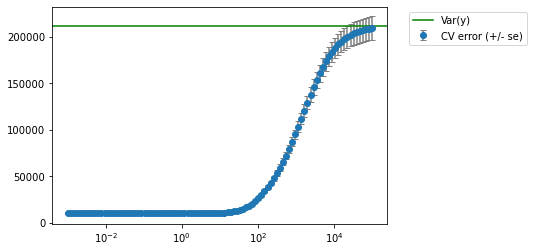

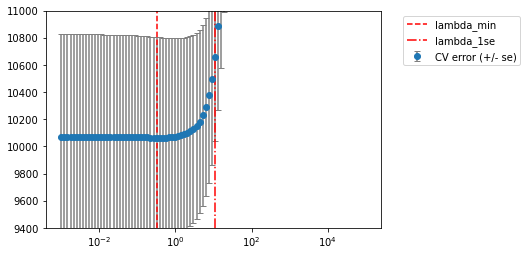

In [23]:
# Représentation des erreurs de validation croisée
erreur = pd.DataFrame({'Lambda': lambda_grille, 'CV error': cv_errors, 'CV se': cv_se})
plt.errorbar(erreur['Lambda'], erreur['CV error'], yerr=erreur['CV se'], fmt='o', \
             ecolor='gray',  capsize=3, label='CV error (+/- se)')
plt.axhline(y=np.var(y), color='green', linestyle='-', label='Var(y)')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Zoom sur la zone intéressante
plt.errorbar(erreur['Lambda'], erreur['CV error'], yerr=erreur['CV se'], fmt='o', \
             ecolor='gray', capsize=3, label='CV error (+/- se)')
plt.axvline(x=lambda_min, linestyle='--', color='red', label='lambda_min')
plt.axvline(x=lambda_1se, linestyle='-.', color='red', label='lambda_1se')
plt.ylim(9400, 11000)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Relancer le bloc qui contient l'estimation avec `RidgeCV` et constater que l'estimation $\widehat\lambda_\text{min}$ est instable. (Vous pouvez jouer sur les valeurs des bornes de `ylim` pour zoomer sur certaines parties du graphique)

On peut ensuite représenter les différentes estimations $\widehat\beta_\lambda$ de $\beta$ en fonction de $\lambda$. Le code ci-dessous permet d'obtenir une figure satisfaisante.

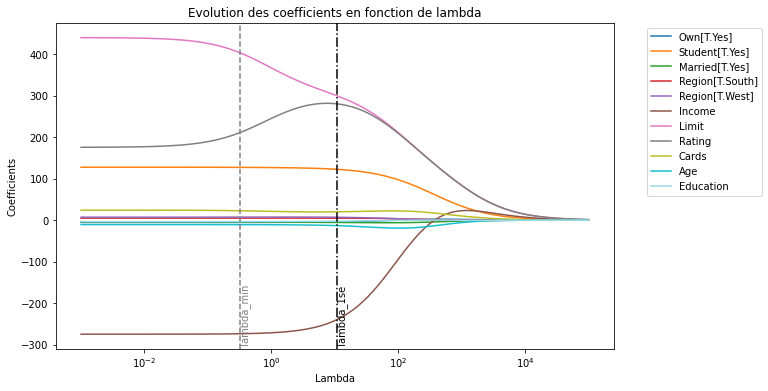

In [24]:
coefs = []
intercepts = []
for alpha in lambda_grille:
    ridge = RidgeCV(alphas=[alpha])
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)
    intercepts.append(ridge.intercept_)

coefs = np.array(coefs)
intercepts = np.array(intercepts)
var_names = m_complet.model.exog_names

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, coefs.shape[1]))
for i in range(coefs.shape[1]):
    plt.plot(lambda_grille, coefs[:, i], label=var_names[i+1], color=colors[i])

plt.axvline(x=lambda_min, linestyle='--', color='grey')
plt.text(lambda_min, plt.ylim()[0], ' lambda_min', rotation=90, verticalalignment='bottom', color='grey')

plt.axvline(x=lambda_1se, linestyle='-.', color='black')
plt.text(lambda_1se, plt.ylim()[0], ' lambda_1se', rotation=90, verticalalignment='bottom', color='black')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Evolution des coefficients en fonction de lambda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Ce graphique représente l'évoluation des différentes coordonnées (couleurs de courbes) de $\widehat\beta_\lambda$ en fonction de $\lambda$ (sur l'axe des abscisses).

- Interpréter ce graphique. Que se passe-t-il en $\lambda=\widehat\lambda_\text{1se}$ ?
- Que peut-on dire sur les valeurs des effets estimés des variables `Limit` et `Rating` pour $\lambda=\widehat\lambda_\text{1se}$ ? Que pouvait-on dire de ces variables à la vue des premiers graphiques de cet exercice ?

On peut récupérer les valeurs de $\widehat\beta$ pour les deux choix de $\lambda$ (min et 1se) avec le code ci-dessous.

In [25]:
res = pd.DataFrame({'Variable': ['Intercept'] + var_names[1:], \
                    'Estimates (lambda_min)': [intercepts[min_error_idx]] + list(coefs[min_error_idx, :]), \
                    'Estimates (lambda_1se)': [intercepts[lambda_1se_idx]] + list(coefs[lambda_1se_idx, :])})
print(f"Coefficients for lambda_min ({lambda_min}) and lambda_1se ({lambda_1se}):")
print(res)

Coefficients for lambda_min (0.3199267137797378) and lambda_1se (10.974987654930557):
           Variable  Estimates (lambda_min)  Estimates (lambda_1se)
0         Intercept              520.015000              520.015000
1        Own[T.Yes]               -5.293447               -4.211542
2    Student[T.Yes]              127.365899              122.617540
3    Married[T.Yes]               -4.433937               -5.417146
4   Region[T.South]                5.071311                4.954917
5    Region[T.West]                7.479632                7.089199
6            Income             -273.607678             -239.236654
7             Limit              403.567863              299.650420
8            Rating              211.148908              280.434974
9             Cards               22.761657               20.272670
10              Age              -10.690783              -13.166359
11        Education               -3.228968               -2.291197


## Exercice 2 : Lasso et sélection de variables

Dans cet exercice, on s'intéresse à prédire le salaire de joueurs professionnels de la ligue majeure de Baseball lors des saisons de 1986 et 1987. Pour prédire ce salaire, on dispose de 19 covariables :

- `AtBat` : nombre de fois à la batte en 1986
- `Hits` : nombre de coups réussis en 1986
- `HmRun` : nombre de home runs en 1986
- `Runs` : nombre de runs en 1986
- `RBI` : nombre de points produits (puissance) en 1986
- `Walks` : nombre de buts sur balle en 1986
- `Years` : nombre d'année d'expérience dans la ligue majeure
- `CAtBat`,..,`CWalks` : même chose que précédemment, mais durant toute la carrière
- `League` : ligue du joueur à la fin de 1986
- `Division` : division du joueur à la fin de 1986
- `PutOuts` : nombre de retraits en 1986
- `Assists` : nombre d'assistances en 1986
- `Errors` : nombre d'erreurs en 1986
- `Salary` : salaire annuel au début de 1987, en milliers de dollars
- `NewLeague` : ligue du joueur au début de 1987.

Ce jeu de données se charge ainsi.

In [27]:
hitters = pd.read_csv("Hitters.csv", sep=",")
hitters.rename(columns={hitters.columns[0]: 'Player'}, inplace=True)
hitters['League'] = hitters['League'].astype('category')
hitters['Division'] = hitters['Division'].astype('category')
hitters['NewLeague'] = hitters['NewLeague'].astype('category')
hitters.dropna(inplace=True)
print(hitters.head())

              Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   
5   -Alfredo Griffin    594   169      4    74   51     35     11    4408   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   
5   1133  ...    501   336     194       A        W     282      421      25   

   Salary  NewLeague  
1   475.0          N  
2   480.0 

En vous inspirant de ce qui a été fait dans le 1er exercice :

- Ajuster le modèle complet qui prédit le salaire en fonction de toutes les autres covariables et étudier les résultats numériques obtenus.

In [31]:
# Ajuster le modèle complet
m_complet = smf.ols(
    formula='Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + League + Division + PutOuts + Assists + Errors + NewLeague',
    data = hitters
).fit()

# Afficher le résumé
print(m_complet.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     15.39
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           7.84e-32
Time:                        09:28:51   Log-Likelihood:                -1876.2
No. Observations:                 263   AIC:                             3792.
Df Residuals:                     243   BIC:                             3864.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        163.1036     90.779      1.

- Etudier la matrice de corrélation de $\mathbf X$ et ses valeurs propres.
- Conclure.

Matrice de corrélation :
[[ 1.          0.96396913  0.55510215  0.8998291   0.79601539  0.62444813
   0.0127255   0.20716625  0.22534146  0.21242155  0.23727777  0.22139318
   0.13292568  0.30960746  0.34211738  0.32557698]
 [ 0.96396913  1.          0.53062736  0.91063014  0.78847819  0.58731051
   0.01859809  0.20667761  0.23560577  0.18936425  0.2388961   0.21938423
   0.12297073  0.29968754  0.30397495  0.27987618]
 [ 0.55510215  0.53062736  1.          0.63107588  0.84910743  0.44045372
   0.11348842  0.21746361  0.21749569  0.49252584  0.25834685  0.34985838
   0.22718318  0.2509315  -0.16160175 -0.00974308]
 [ 0.8998291   0.91063014  0.63107588  1.          0.77869235  0.6970151
  -0.01197495  0.1718108   0.19132697  0.22970104  0.23783121  0.20233548
   0.16370021  0.27115986  0.17925786  0.19260879]
 [ 0.79601539  0.78847819  0.84910743  0.77869235  1.          0.56950476
   0.12966795  0.27812591  0.29213714  0.44218969  0.30722616  0.38777657
   0.23361884  0.31206456  0.062

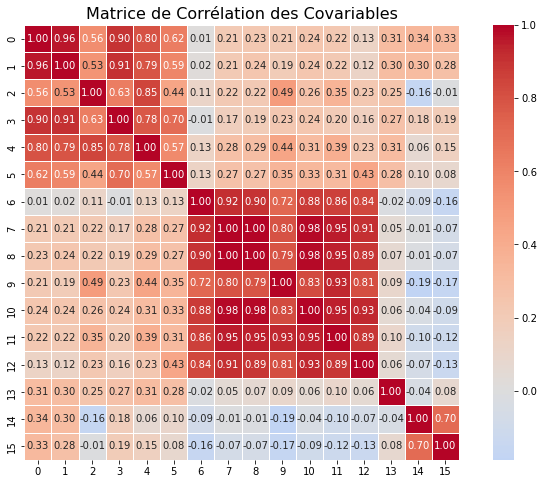

Valeurs propres de la matrice de corrélation :
[7.24990606e+00 4.10984817e+00 1.72797668e+00 8.70380332e-01
 6.97370674e-01 5.12373310e-01 2.51685072e-01 1.84941088e-01
 1.32425387e-01 9.79711095e-02 6.13550622e-02 5.50365752e-02
 2.81843510e-02 1.44496670e-02 4.89431372e-03 1.20214805e-03]


In [32]:
# Extraire X (toutes les colonnes sauf 'Salary') et centrer-réduire
X = hitters.drop(columns=['Salary'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))  # Garde seulement les colonnes numériques

# Calculer la matrice de corrélation
C = np.corrcoef(X_scaled, rowvar=False)

# Vérifier la matrice
print("Matrice de corrélation :")
print(C)

# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(12, 8))  # Taille de la figure
sns.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True, linewidths=0.5)

# Ajouter un titre
plt.title("Matrice de Corrélation des Covariables", fontsize=16)

# Afficher
plt.show()

# Calcul des valeurs propres
eigenvalues, _ = np.linalg.eigh(C)

# Trier les valeurs propres
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Afficher les valeurs propres
print("Valeurs propres de la matrice de corrélation :")
print(eigenvalues_sorted)


### Lasso

On peut obtenir les estimations Lasso de $\beta$ pour différentes valeurs de $\lambda$ ainsi. 

In [33]:
# Calcul de X_scaled et y
covariates = hitters.columns.copy()
covariates = covariates.drop(['Player', 'Salary'])
formula = 'Salary ~ ' + ' + '.join(covariates)
m_complet = smf.ols(formula=formula, data=hitters).fit()

X = m_complet.model.exog
y = m_complet.model.endog

X_scaled = StandardScaler().fit_transform(X[:, 1:])

# Lasso
# Ajustements
lambda_grille = np.logspace(3, -2, 100)
lasso_cv = LassoCV(alphas=lambda_grille, cv=10)
lasso_cv.fit(X_scaled, y)  # Exclude the intercept column

# Erreur de validation croisée
cv_errors = np.mean(lasso_cv.mse_path_, axis=1)
cv_se = np.std(lasso_cv.mse_path_, axis=1) / np.sqrt(10)

# Sélection de lambda avec la règle du min et du 1se
min_error_idx = np.argmin(cv_errors)
min_error = cv_errors[min_error_idx]
one_se_threshold = min_error + cv_se[min_error_idx]
lambda_min = lambda_grille[min_error_idx]
lambda_1se_idx = np.where(cv_errors <= one_se_threshold)[0][0]
lambda_1se = lambda_grille[lambda_1se_idx]

Commenter les résultats du graphique ci-dessous.

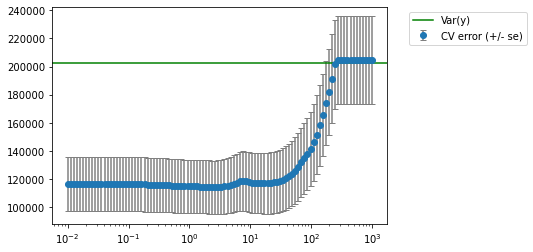

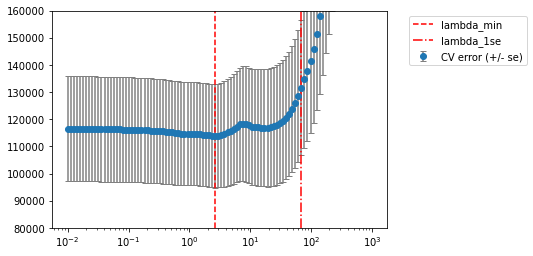

In [34]:
erreur = pd.DataFrame({'Lambda': lambda_grille, 'CV error': cv_errors, 'CV se': cv_se})
plt.errorbar(erreur['Lambda'], erreur['CV error'], yerr=erreur['CV se'], fmt='o', \
             ecolor='gray',  capsize=3, label='CV error (+/- se)')
plt.axhline(y=np.var(y), color='green', linestyle='-', label='Var(y)')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Zoom sur la zone intéressante
plt.errorbar(erreur['Lambda'], erreur['CV error'], yerr=erreur['CV se'], fmt='o', \
             ecolor='gray', capsize=3, label='CV error (+/- se)')
plt.axvline(x=lambda_min, linestyle='--', color='red', label='lambda_min')
plt.axvline(x=lambda_1se, linestyle='-.', color='red', label='lambda_1se')
plt.ylim(80000, 160000)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Comme pour la régression ridge, on peut représenter l'évolution de $\widehat\beta_\lambda$ en fonction de $\lambda$. Voici le code qui permet de le faire.

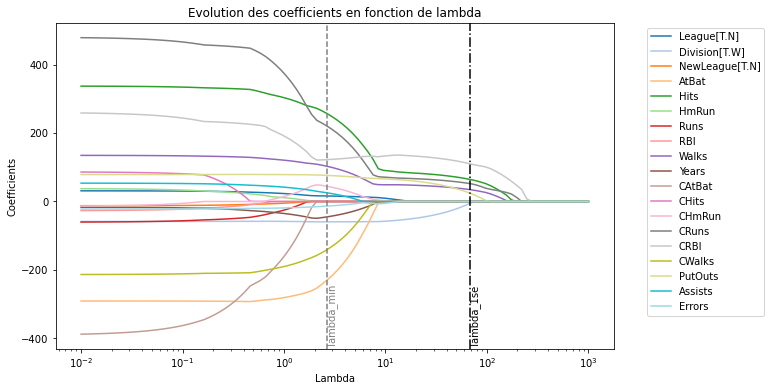

In [35]:
coefs = []
intercepts = []
for alpha in lambda_grille:
    lasso = Lasso(alpha=alpha, tol=1e-5, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)
    intercepts.append(lasso.intercept_)

coefs = np.array(coefs)
intercepts = np.array(intercepts)
var_names = m_complet.model.exog_names

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, coefs.shape[1]))
for i in range(coefs.shape[1]):
    plt.plot(lambda_grille, coefs[:, i], label=var_names[i+1], color=colors[i])

plt.axvline(x=lambda_min, linestyle='--', color='grey')
plt.text(lambda_min, plt.ylim()[0], ' lambda_min', rotation=90, verticalalignment='bottom', color='grey')

plt.axvline(x=lambda_1se, linestyle='-.', color='black')
plt.text(lambda_1se, plt.ylim()[0], ' lambda_1se', rotation=90, verticalalignment='bottom', color='black')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Evolution des coefficients en fonction de lambda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Peut-on voir sur ce graphique que la méthode Lasso annule certaines coordonnées de $\beta$ ? Comparer avec le même type graphique pour la méthode ridge dans l'exercice 1.

- Récupérer l'estimation de $\beta$ pour les deux choix de $\lambda$ (min et 1se), et constater que certaines coordonnées ont été annulées.

In [36]:
res = pd.DataFrame({'Variable': ['Intercept'] + var_names[1:], \
                    'Estimates (lambda_min)': [intercepts[min_error_idx]] + list(coefs[min_error_idx, :]), \
                    'Estimates (lambda_1se)': [intercepts[lambda_1se_idx]] + list(coefs[lambda_1se_idx, :])})
print(f"Coefficients for lambda_min ({lambda_min}) and lambda_1se ({lambda_1se}):")
print(res)

Coefficients for lambda_min (2.656087782946687) and lambda_1se (68.92612104349699):
          Variable  Estimates (lambda_min)  Estimates (lambda_1se)
0        Intercept              535.925882              535.925882
1      League[T.N]               16.132670                0.000000
2    Division[T.W]              -59.540043               -4.483489
3   NewLeague[T.N]               -0.000000                0.000000
4            AtBat             -230.322731                0.000000
5             Hits              257.262262               64.315924
6            HmRun                0.000000                0.000000
7             Runs               -0.000000                0.000000
8              RBI                0.000000                0.000000
9            Walks              103.013633               34.466622
10           Years              -45.031520                0.000000
11          CAtBat               -0.000000                0.000000
12           CHits                0.000000   

### Sélection de covariables


**On commence par la méthode progressive.**


- On utilise ici le `ForwardModelSelector` programmé dans `ModelSelector.py` pour mettre en œuvre la méthode de sélection progressive.
- Quel est le modèle choisi par le critère AIC ? Par le critère BIC ?

In [38]:
from ModelSelector import ForwardModelSelector
selector = ForwardModelSelector(formula=formula, dataset=hitters)
selector = selector.fit()
bic_model = selector.best_model('BIC').fit()
aic_model = selector.best_model('AIC').fit()
print(bic_model.summary())
print(aic_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     44.18
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           6.82e-37
Time:                        10:20:04   Log-Likelihood:                -1886.6
No. Observations:                 263   AIC:                             3787.
Df Residuals:                     256   BIC:                             3812.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        91.5118     65.000      1.408

**Même étude avec la méthode rétrograde**

- Implémenter la méthode rétrograde.
- Quelles sont les deux premières variables à sortir du modèle complet ?
- Quels sont les modèles choisis par les critères BIC, AIC ?

- Comparer les résultats obtenus entre les méthodes progressives et rétrogrades. Comparer également les résultats avec ceux de l'estimation Lasso.
